In [1]:
import pandas as pd, warnings, matplotlib.pyplot as plt
font = {'size'   : 22}

plt.rc('font', **font)

In [2]:
df_affables = pd.read_json("stats/selfsupvaryaffables.json")
df_random = pd.read_json("stats/selfsupvaryrandom.json")
df_adversarials = pd.read_json("stats/selfsupvaryadversarial.json")

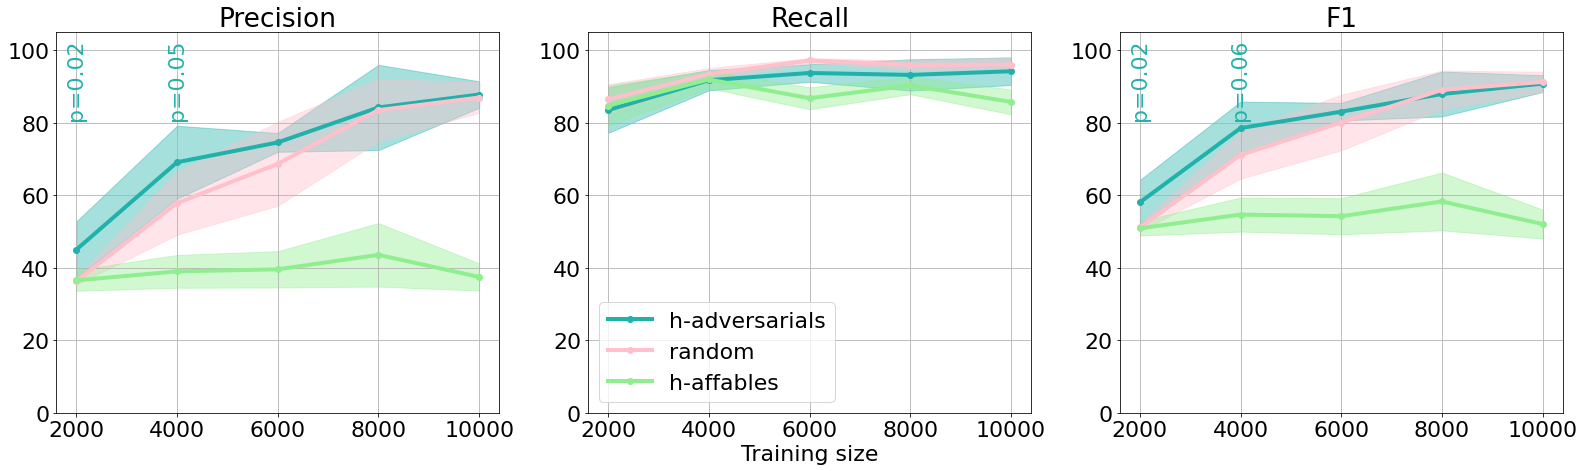

In [3]:
from scipy import stats

def plot_stdline(x, y_mean, y_std, ax, label, color):
    ax.plot(x, y_mean, color=color, label=label, linewidth = 4.0, marker='o')
    ax.fill_between(x, y_mean - y_std, y_mean + y_std, color=color, alpha=0.4)
    ax.grid(True)
    ax.set_title(label)


def plot_tvalue(train_size, column,  ax, color="black"):
    t_test = stats.ttest_ind(df_adversarials.query(f"TrainSize == {train_size}")[column], 
                df_random.query(f"TrainSize == {train_size}")[column], 
                alternative="greater")
    ax.text(train_size-200, 82, "p="+str(round(t_test.pvalue,2))
         , color= color, rotation="vertical")




def plot_comparison_linestd(df, ax, **kwargs):
    
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", message=".*")

        my_colors= [ "green",  "orange"]
        
        linetype = "-"
        legend_suffix = ""


        column_renames={"Precision": "Precision" , 
                        "TrainSize" : "Train size" ,
                        "Recall" : "Recall" , 
                        "TrainAffableRate" : "Affable rate" ,
                        "F1": "F1" , 
                       }
        ax[0].set_ylim(0,105)
        ldf = df.groupby("TrainSize")["Precision"].describe()
        plot_stdline(ldf.index, ldf["mean"], ldf["std"], ax[0],  label='Precision',  **kwargs)
       

        ax[1].set_ylim(0,105)
        ldf = df.groupby("TrainSize")["Recall"].describe()
        plot_stdline(ldf.index, ldf["mean"], ldf["std"], ax[1],  label='Recall',  **kwargs)


        ax[2].set_ylim(0,105)
        ldf = df.groupby("TrainSize")["F1"].describe()
        plot_stdline(ldf.index, ldf["mean"], ldf["std"], ax[2],  label='F1',  **kwargs)

        


fig, ax = plt.subplots(1,3, figsize=(27,7))
plot_comparison_linestd(df_adversarials, ax, color="lightseagreen")
plot_comparison_linestd(df_random, ax, color="pink")
plot_comparison_linestd(df_affables, ax, color="lightgreen",)


ax[1].legend(labels=["h-adversarials", "random","h-affables" ])
ax[1].set_xlabel("Training size")


plot_tvalue(2000, "Precision", ax[0], color="lightseagreen")
plot_tvalue(4000, "Precision", ax[0], color="lightseagreen")


plot_tvalue(2000, "F1", ax[2], color="lightseagreen")
plot_tvalue(4000, "F1", ax[2], color="lightseagreen")




plt.show()